In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import sklearn
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.shape

(96453, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
pd.DataFrame(df.isna().mean()).T

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0.0,0.0,0.00536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


## Zamiana pustych wartości 


In [8]:
pd.DataFrame(df.isna().mean()).T

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0.0,0.0,0.00536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df["Precip Type"].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [10]:
df_precip_null = df.loc[df["Precip Type"].isnull()]
df_precip_null

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 19:00:00.000 +0100,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,0.0,1021.73,Mostly cloudy starting in the afternoon.
95585,2016-10-31 20:00:00.000 +0100,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,0.0,1021.76,Mostly cloudy starting in the afternoon.
95586,2016-10-31 21:00:00.000 +0100,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,0.0,1021.81,Mostly cloudy starting in the afternoon.
95587,2016-10-31 22:00:00.000 +0100,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,0.0,1021.83,Mostly cloudy starting in the afternoon.


In [11]:
temp_max = round(df_precip_null["Temperature (C)"].max(),2)
temp_min = round(df_precip_null["Temperature (C)"].min(),2)
print(f"Temperatura dla brakujących wartości max={temp_max}, min={temp_min}")

Temperatura dla brakujących wartości max=25.04, min=1.26


In [12]:
df["Precip Type"].isnull

<bound method Series.isnull of 0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96453, dtype: object>

In [13]:
df.loc[df["Precip Type"] == np.NaN]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [14]:
df['Precip Type'] = df['Precip Type'].replace(np.NaN, 'rain')
df["Precip Type"].value_counts(dropna=False)

rain    85741
snow    10712
Name: Precip Type, dtype: int64

## Stworzenie kolumn dla miesiąca i godziny

In [15]:
df["Month"] = df["Formatted Date"].apply(lambda x: int(x[5:7]))

In [16]:
df["Hour"] = df["Formatted Date"].apply(lambda x: int(x[11:13]))

## Usuwanie kolumn

In [17]:
for col in df:
    a = df[col].unique()
    if len(a) == 1:
        print(col, a)

Loud Cover [0.]


In [18]:
df = df.drop('Loud Cover', axis=1)

In [19]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Month,Hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,4,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,4,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,4,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,4,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,4,4


In [20]:
df = df.drop('Formatted Date', axis=1)

In [21]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Month,Hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,4,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,4,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,4,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,4,3
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,4,4


## Columny kategoreyczne

In [22]:
# Precip Type column
df = pd.get_dummies(df, columns = ['Precip Type'])
df.rename(columns={'Precip Type_rain': 'Rain', 'Precip Type_snow': 'Snow'}, inplace=True)

In [23]:
def create_summary_columns(column_name, data_frame):
    if column_name not in data_frame.columns:
        data_frame[column_name] = 0
        
separator = " and "
list_of_values = df["Summary"].unique()

# Summary column
# create new columns from Summary unique values
for unique_value in list_of_values:
    if separator in unique_value:
        value_list = unique_value.split(separator)
        for col_name in value_list:
            create_summary_columns(col_name, df)
            df.loc[df["Summary"] == unique_value, col_name] = 1
    else:
        create_summary_columns(unique_value, df)
        df.loc[df["Summary"] == unique_value, unique_value] = 1
df = df.drop('Summary', axis=1)

## Columny kategoreyczne

In [24]:
# Add column with temerature difference between measured and apparent temperature 
df["temperature difference"] = df["Apparent Temperature (C)"] - df["Temperature (C)"]
df = df.drop("Apparent Temperature (C)", axis=1)

In [25]:
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Month,Hour,Rain,...,Foggy,Breezy,Clear,Humid,Windy,Dry,Dangerously Windy,Light Rain,Drizzle,temperature difference
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,4,0,1,...,0,0,0,0,0,0,0,0,0,-2.083333
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,4,1,1,...,0,0,0,0,0,0,0,0,0,-2.127778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,4,2,1,...,0,0,0,0,0,0,0,0,0,0.000000
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,4,3,1,...,0,0,0,0,0,0,0,0,0,-2.344444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,4,4,1,...,0,0,0,0,0,0,0,0,0,-1.777778


## Analiza wykresów cech
TODO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! IMPORT



In [33]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 8

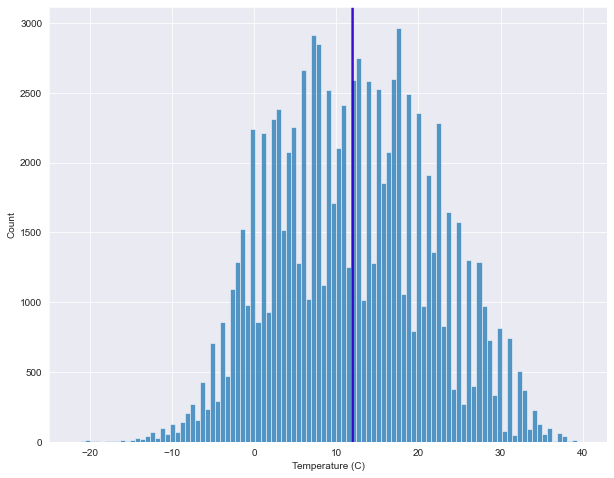

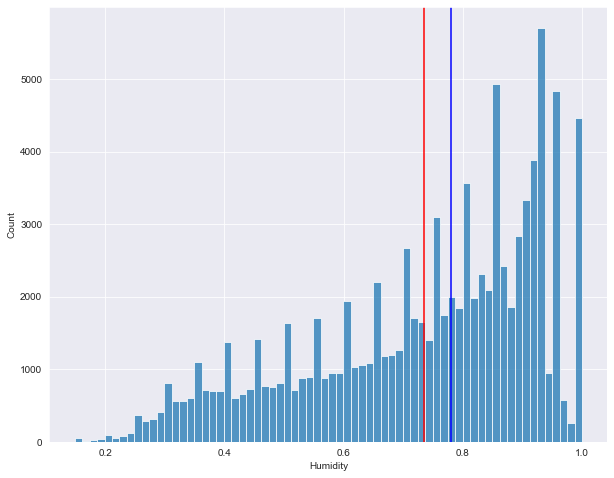

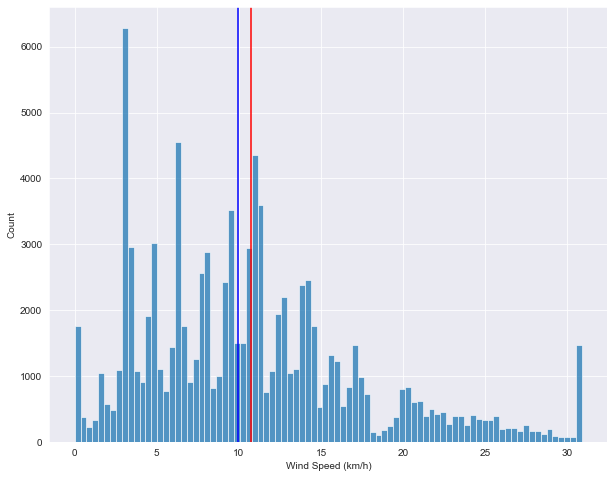

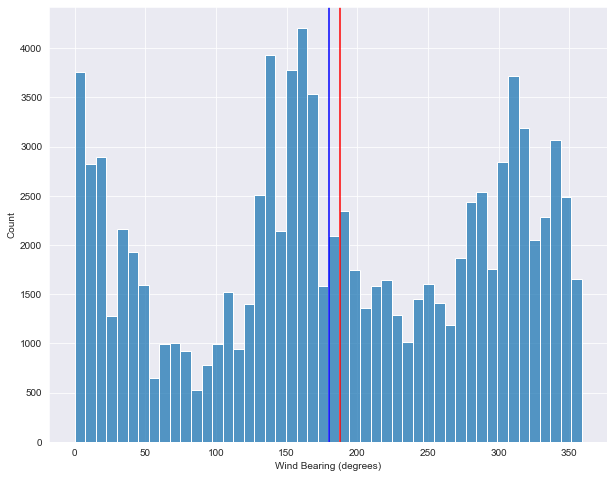

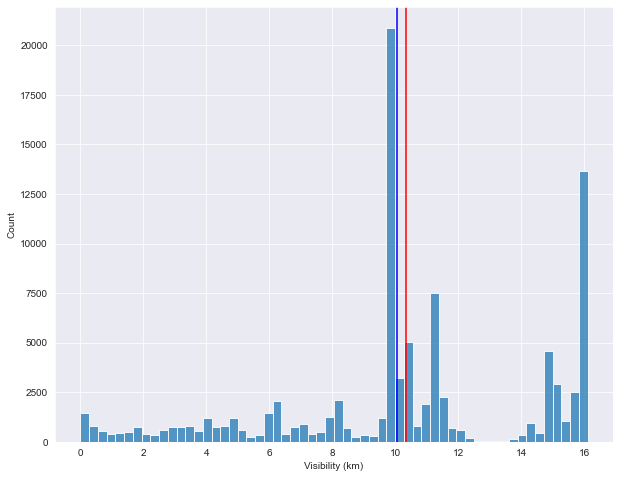

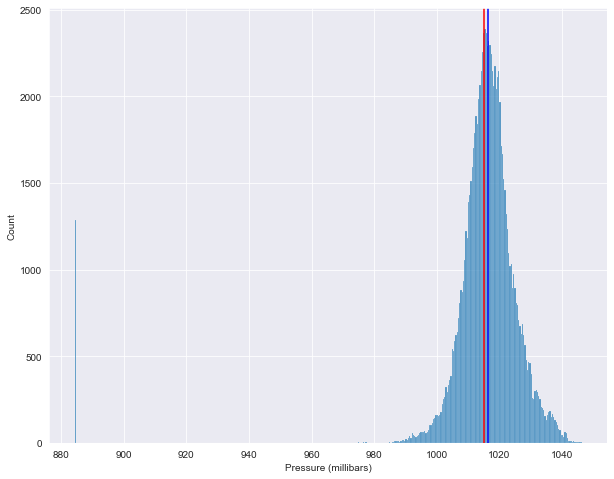

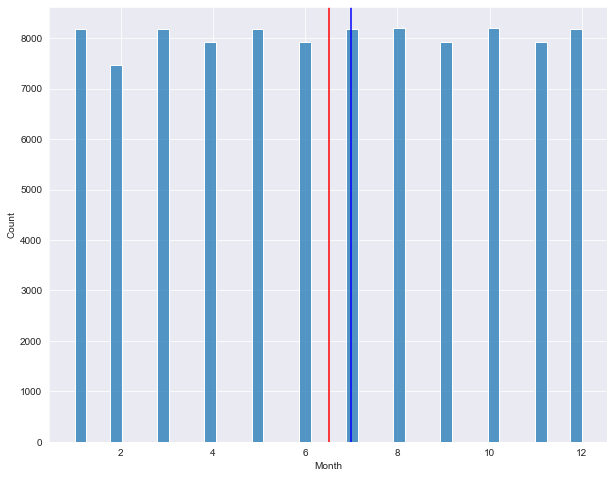

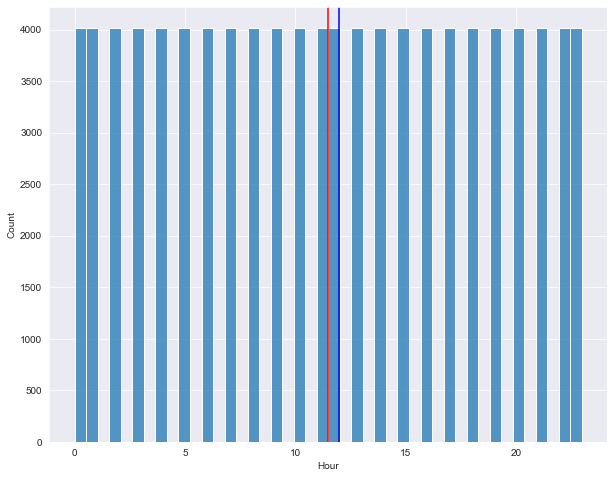

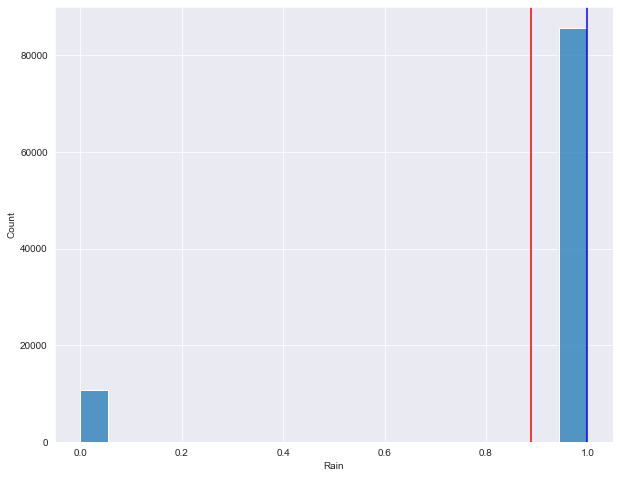

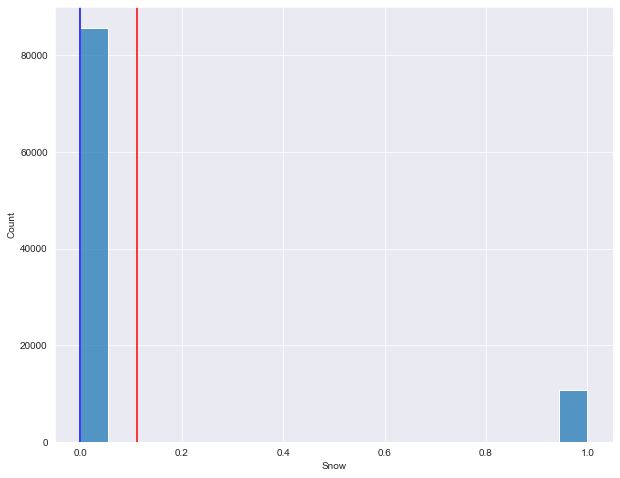

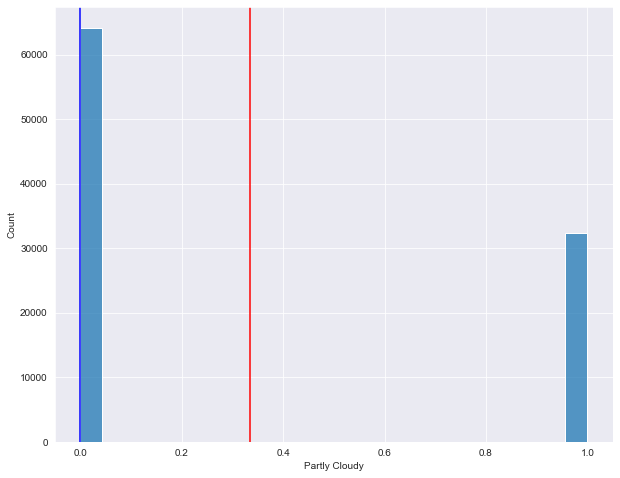

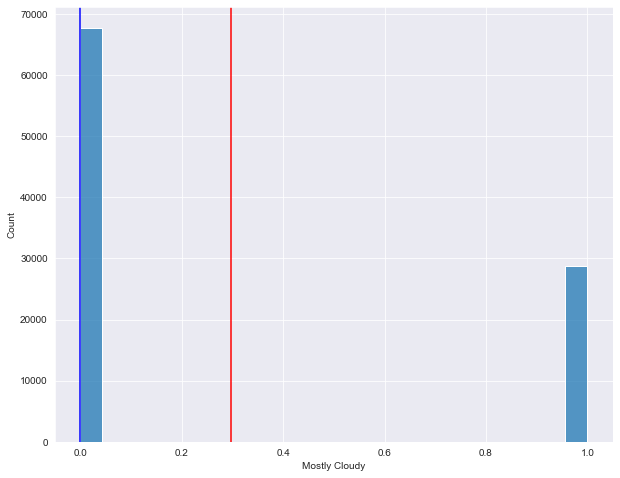

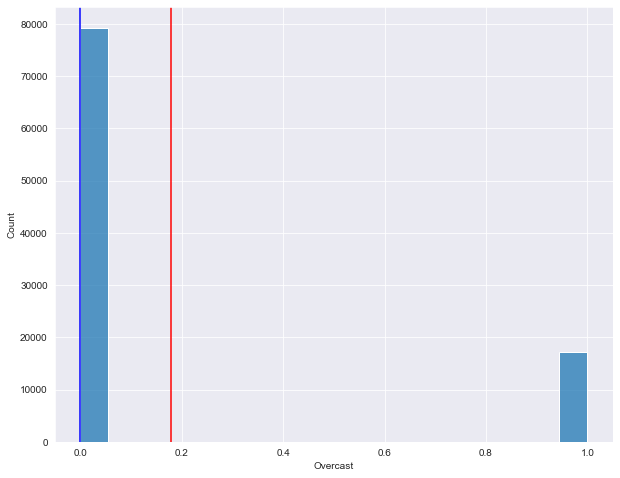

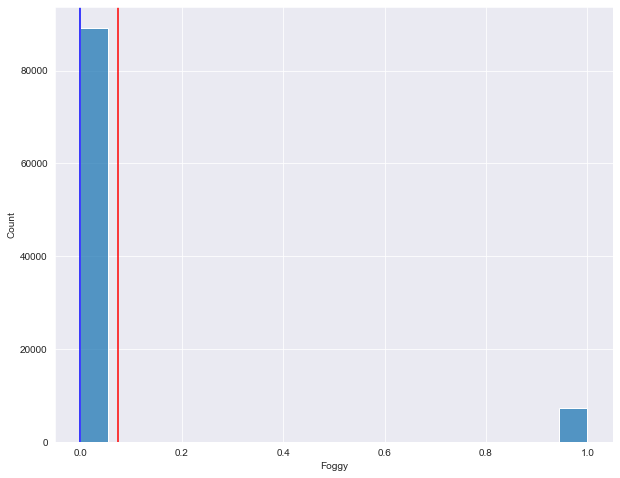

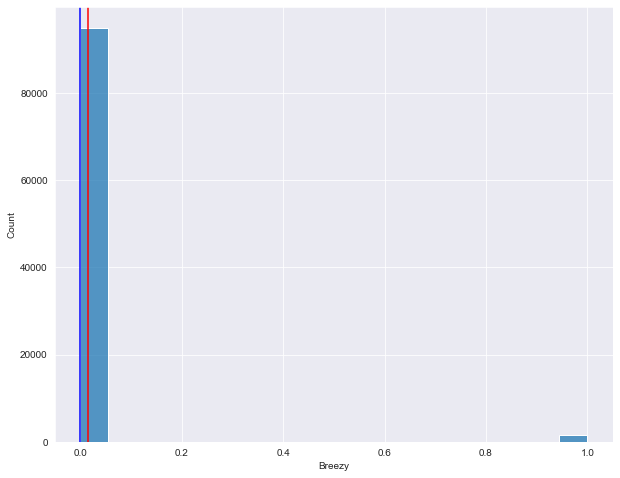

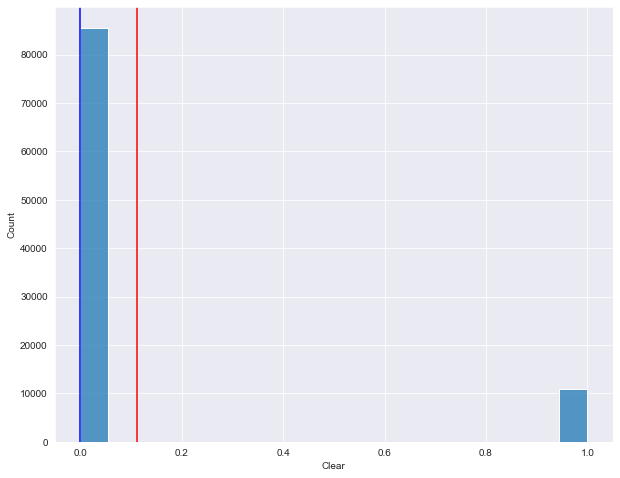

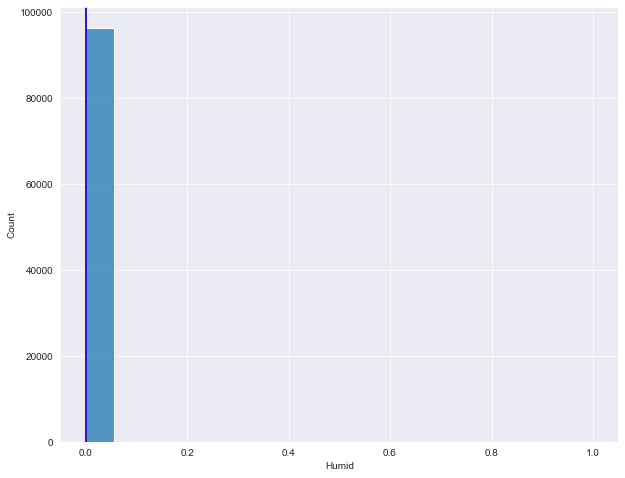

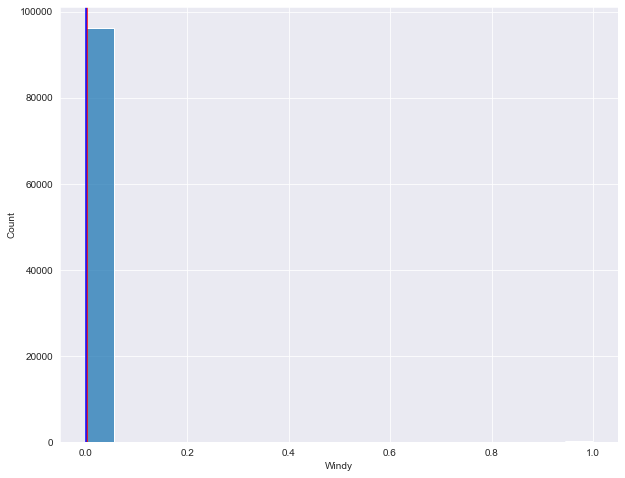

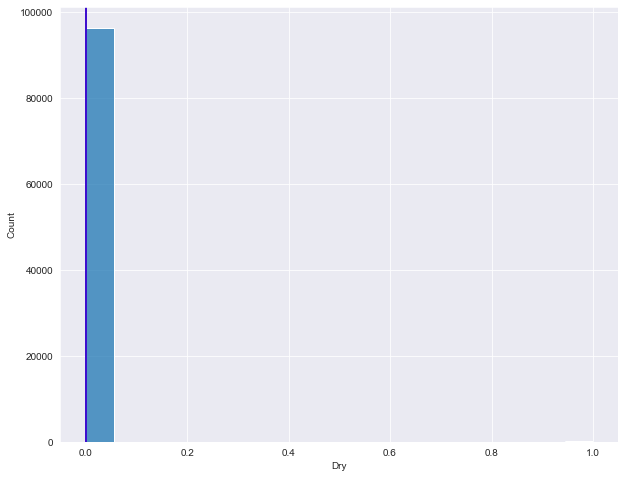

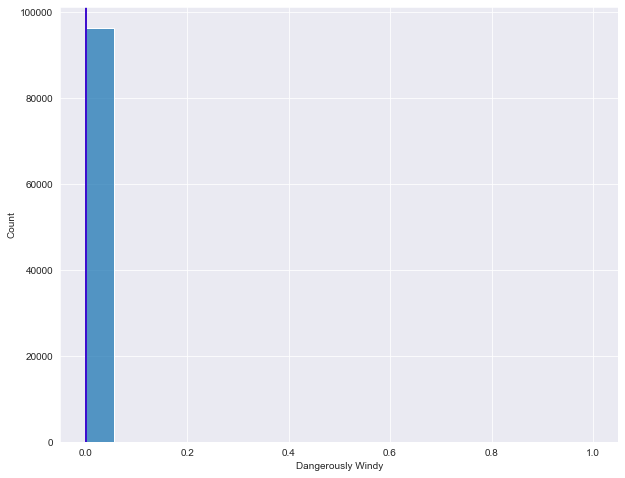

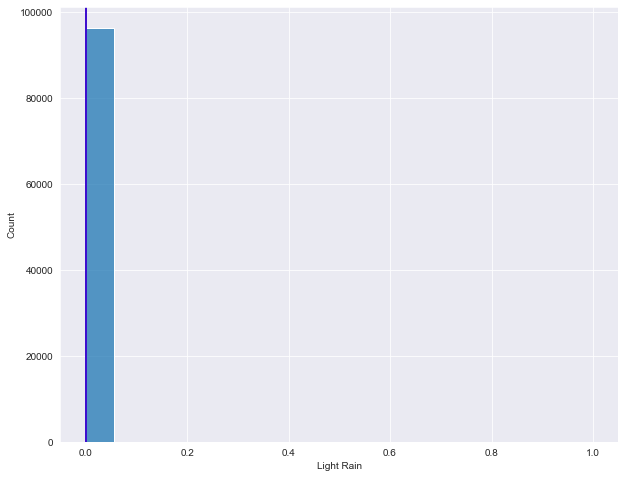

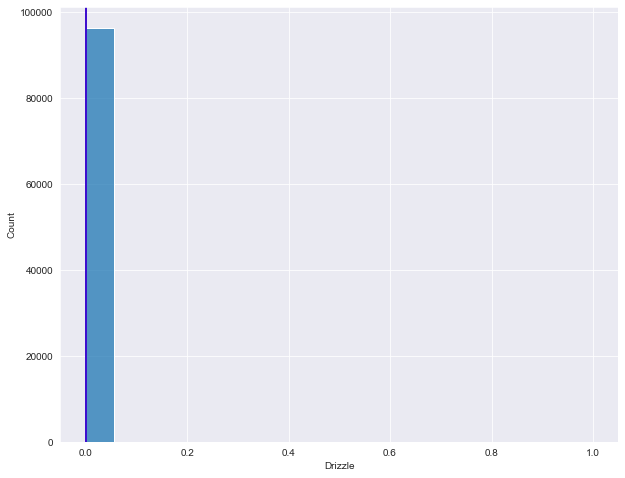

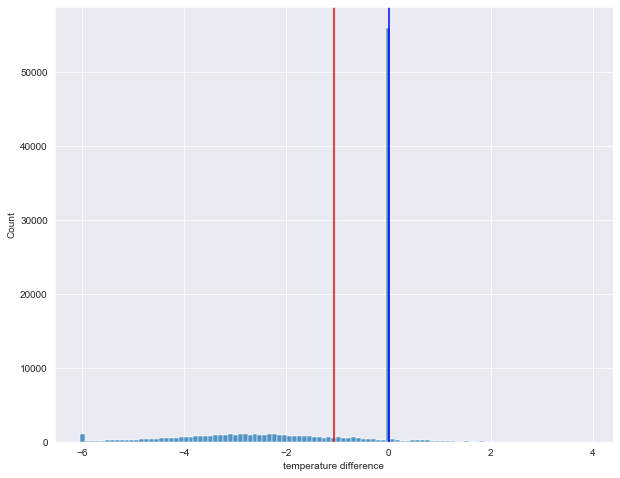

In [34]:
for feature in df.columns:
    if df[feature].dtypes != 'object':
        sns.histplot(df, x=feature)
        plt.axvline(x=df[feature].mean(), color='red')
        plt.axvline(x=df[feature].median(), color='blue')
    
        plt.show()

Cecha Temperature (C) ma prawie rozkład normalny

## Wykrycie i zamiana wartości odstających

In [31]:
column_num = ['Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'temperature difference']
for col in column_num:
    high_3sigm = df[col].mean() + 3*df[col].std()
    low_3sigm = df[col].mean() - 3*df[col].std()
    print(f"Column name: {col}\n3-sigm max {high_3sigm}\t3-sigm min {low_3sigm}")
    print(f"Max for {col}: {df[col].max()}\tMin for {col}: {df[col].min()}")
    print("Outliers to replace:", len(df.loc[df[col] < low_3sigm]) + len(df.loc[df[col] > high_3sigm]))
    df.loc[df[col] < low_3sigm, col] = low_3sigm
    df.loc[df[col] > high_3sigm, col] = high_3sigm
    print("Outliers number:", len(df.loc[df[col] < low_3sigm]) + len(df.loc[df[col] > high_3sigm]))
    print("")

Column name: Humidity
3-sigm max 1.3210007179646328	3-sigm min 0.148866625943207
Max for Humidity: 1.0	Min for Humidity: 0.14848074913421072
Outliers to replace: 28
Outliers number: 0

Column name: Wind Speed (km/h)
3-sigm max 30.895871016546195	3-sigm min -9.384763607971266
Max for Wind Speed (km/h): 31.551353178569663	Min for Wind Speed (km/h): 0.0
Outliers to replace: 1345
Outliers number: 0

Column name: Wind Bearing (degrees)
3-sigm max 509.65951761803706	3-sigm min -134.64105266619524
Max for Wind Bearing (degrees): 359.0	Min for Wind Bearing (degrees): 0.0
Outliers to replace: 0
Outliers number: 0

Column name: Visibility (km)
3-sigm max 22.92369450350592	3-sigm min -2.2290446450316264
Max for Visibility (km): 16.1	Min for Visibility (km): 0.0
Outliers to replace: 0
Outliers number: 0

Column name: Pressure (millibars)
3-sigm max 1139.581823156564	3-sigm min 884.3119664733103
Max for Pressure (millibars): 1046.38	Min for Pressure (millibars): 652.3262388064162
Outliers to replac

In [29]:
df.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary', 'Month', 'Hour', 'Rain', 'Snow', 'Partly Cloudy',
       'Mostly Cloudy', 'Overcast', 'Foggy', 'Breezy', 'Clear', 'Humid',
       'Windy', 'Dry', 'Dangerously Windy', 'Light Rain', 'Drizzle',
       'temperature difference'],
      dtype='object')

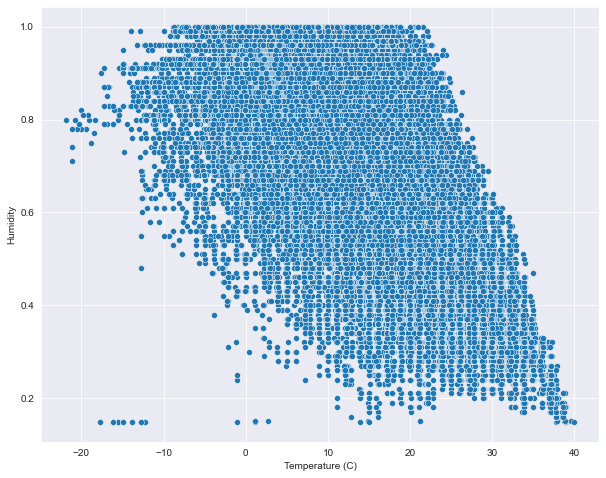

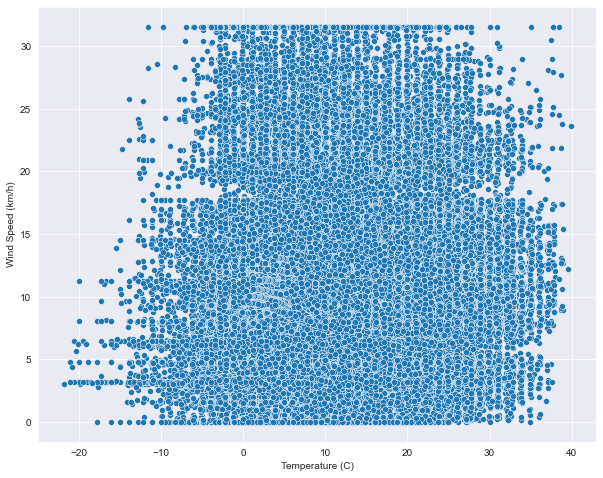

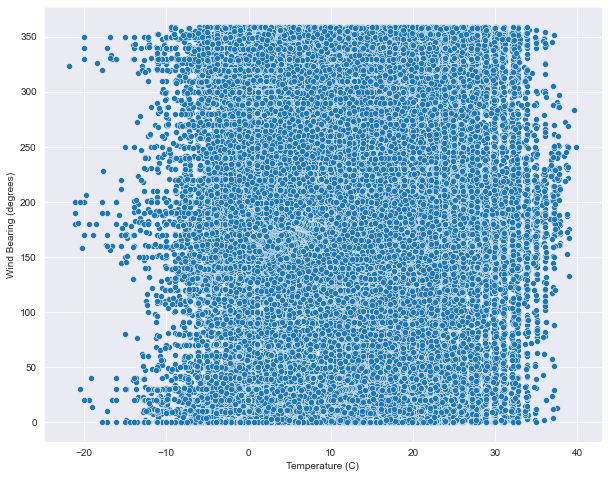

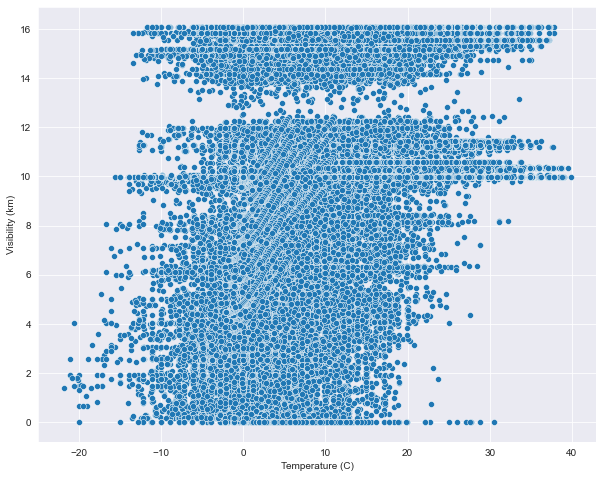

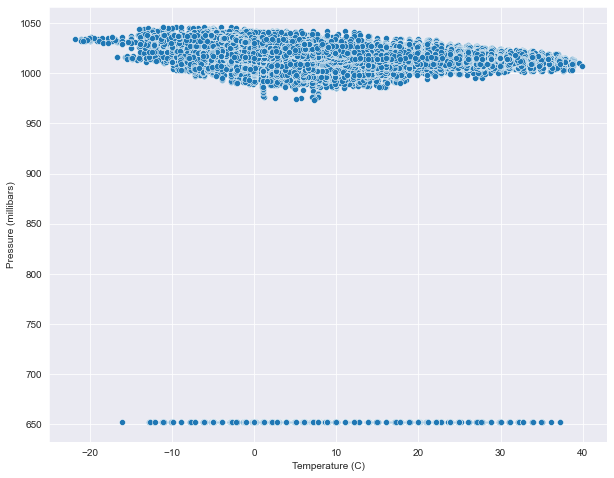

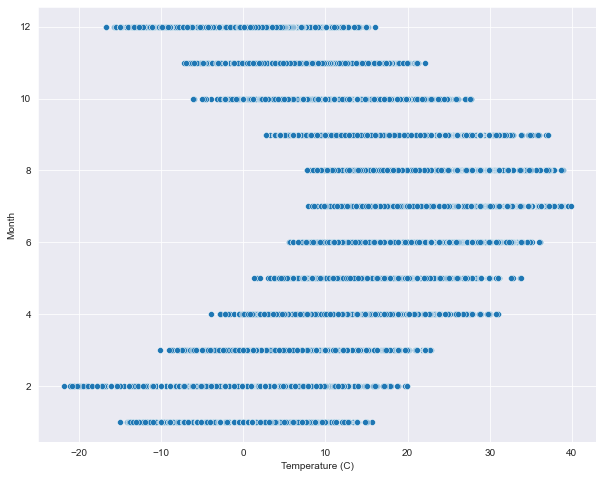

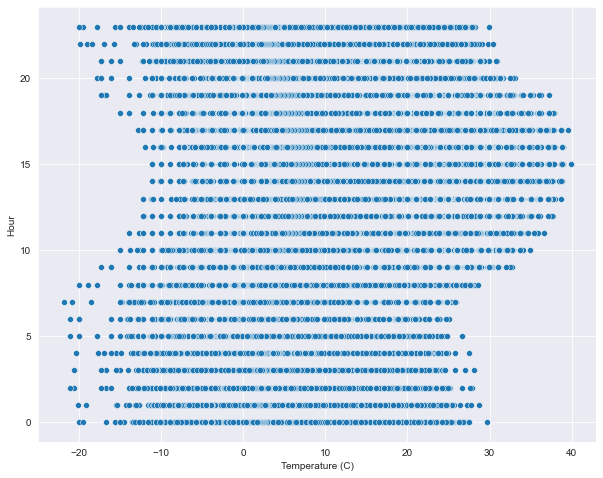

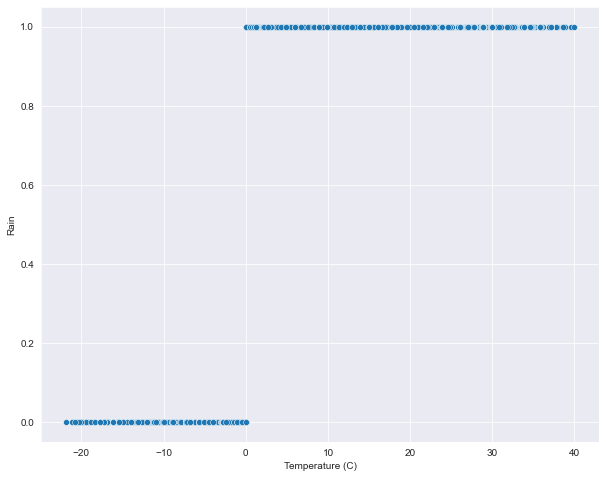

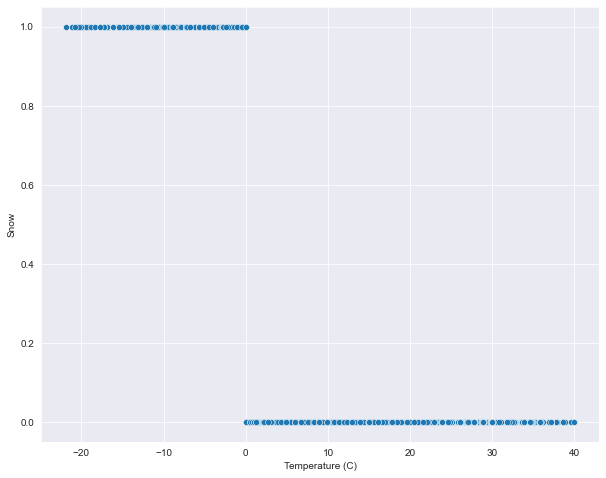

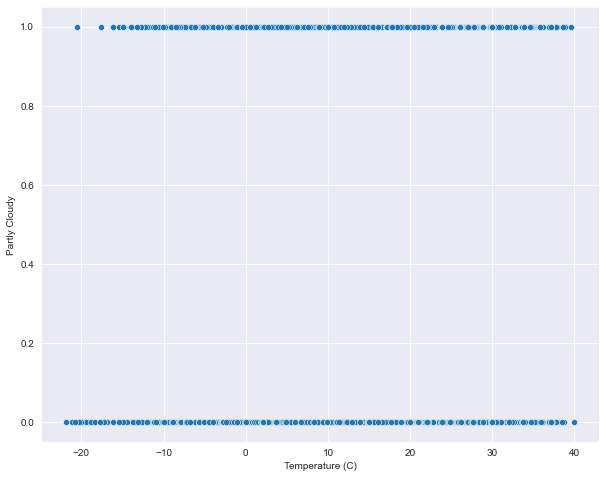

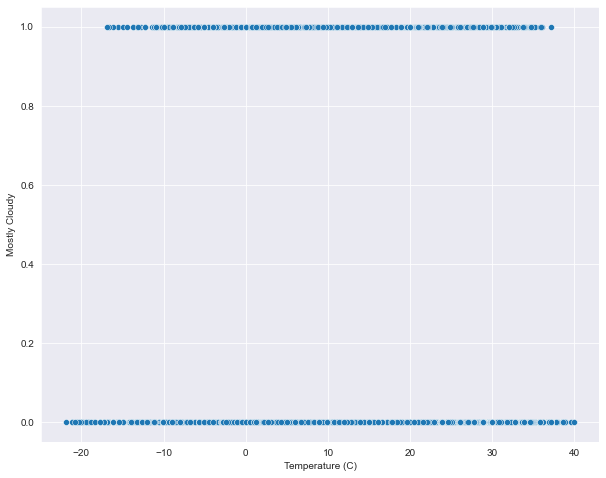

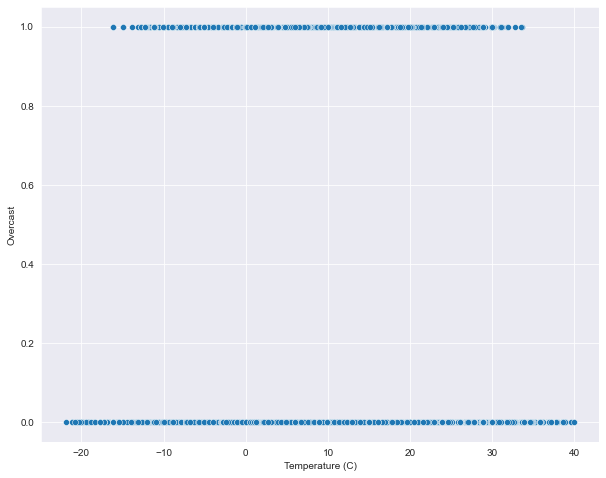

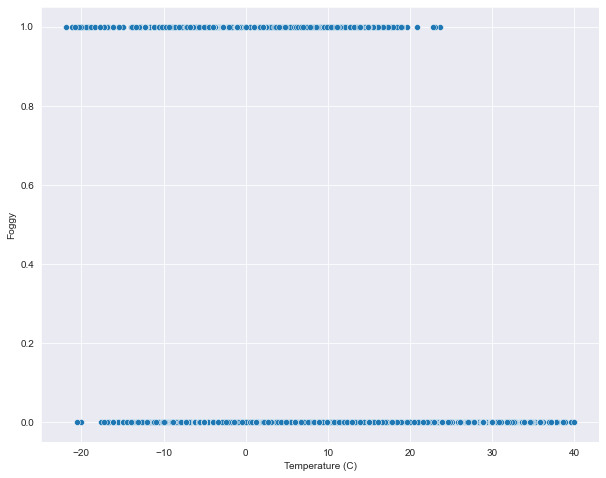

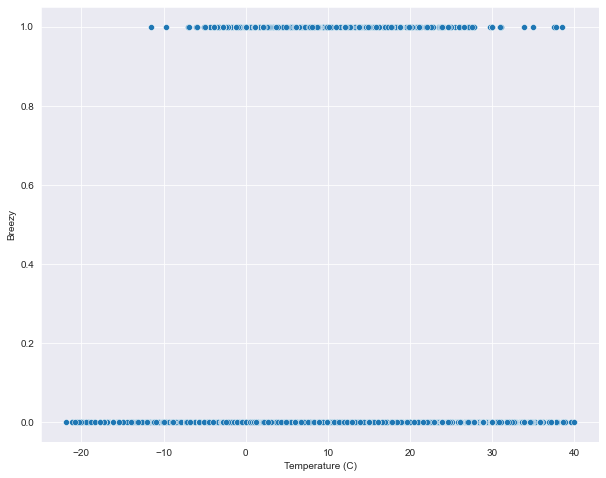

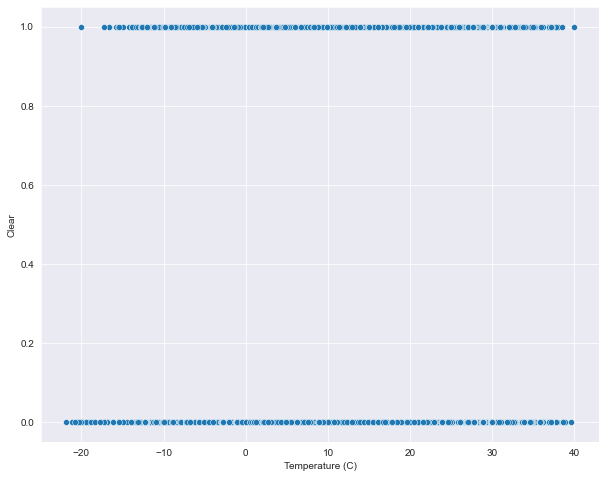

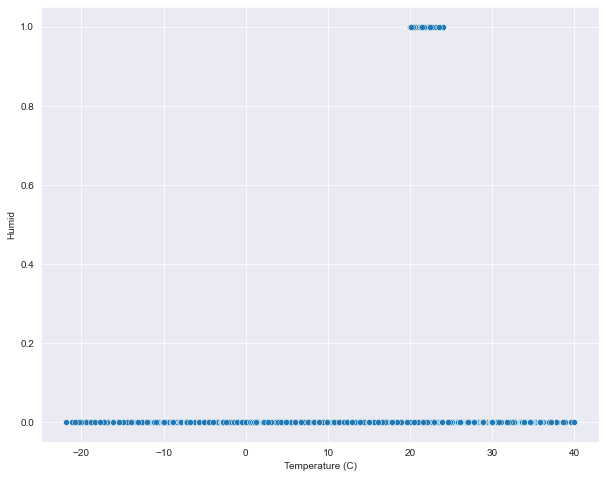

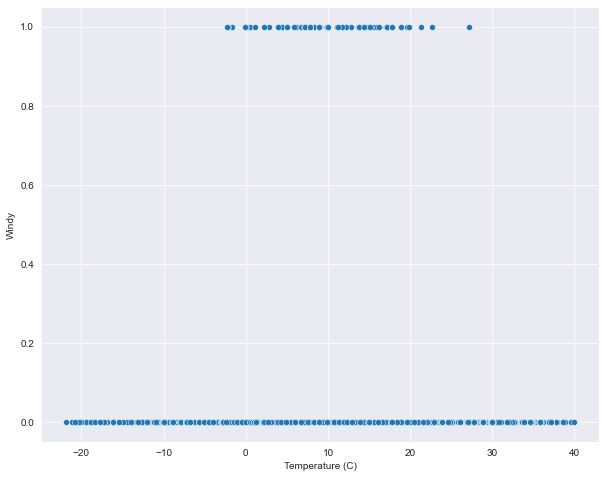

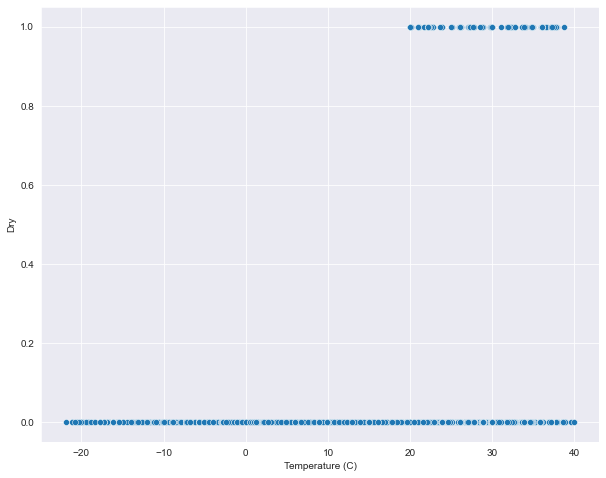

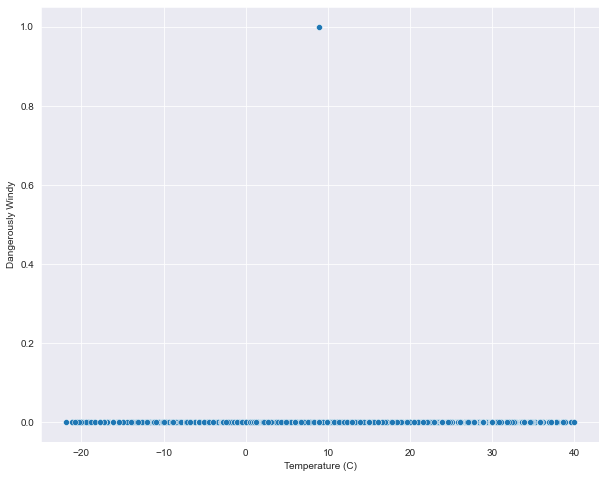

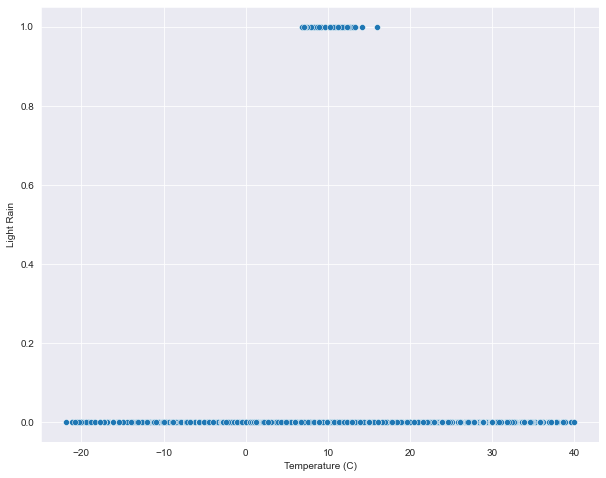

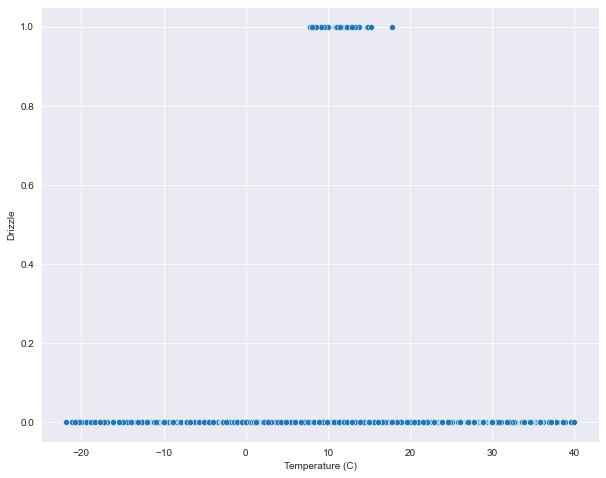

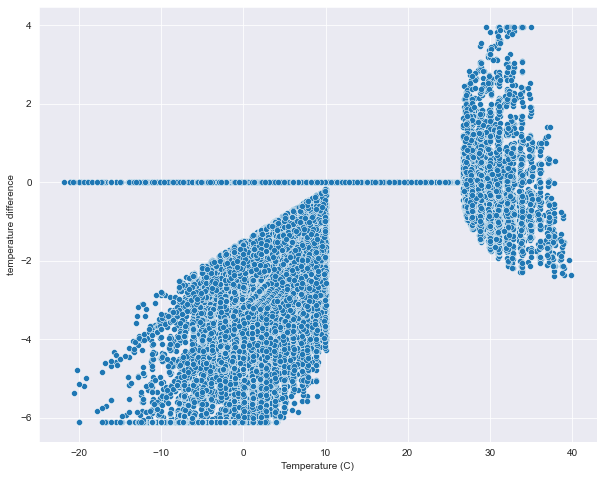

In [30]:
for col in df.drop(columns = ["Temperature (C)", 'Daily Summary']):
    sns.scatterplot(data = df, x = "Temperature (C)", y = col)
    plt.show()